In [33]:
import pandas as pd
import numpy as np

# data 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
import graphviz

# Scale 변환
from sklearn.preprocessing import StandardScaler

# data split
from sklearn.model_selection import train_test_split

# SVM
from sklearn.svm import SVC


# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# 경고문 제거
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
# !ls -l /usr/share/fonts/truetype/
!rm -rf ~/.cache/matplotlib/*
!fc-cache -fv

import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 전체 적용
plt.rcParams["font.family"] = 'NanumMyeongjo'

/usr/share/fonts: caching, new cache contents: 0 fonts, 6 dirs
/usr/share/fonts/X11: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/X11/Type1: caching, new cache contents: 8 fonts, 0 dirs
/usr/share/fonts/X11/encodings: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/X11/encodings/large: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/X11/misc: caching, new cache contents: 89 fonts, 0 dirs
/usr/share/fonts/X11/util: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cMap: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/cmap/adobe-cns1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-gb1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan2: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-korea1: c

fc-cache: succeeded


# Summary

## 결론 도출

1. 모델의 정확도는 0.953으로 Scale 전과 비교하여 0.70 상향되었다.  


2. 분석의 목표는 실제 환자들에게서 종양을 분석하여 양성인자인지를 식별하는 것이다.  

    128의 test data에서 양성으로 예측한 recall 값은 0.911으로 높은 값이 도출되었다.  
    
    또한 실제로 암인데 정상으로 진단하는 비율은 0.089로 오진단의 비율은 낮게 측정되었다.
    
|최종모델의 정확도(F1 Score)||0.932|
|:---:|:---:|:---:|
|Confusion Matrix|0|1|
|0|81|2|
|1|4|41|


# 분석에 사용된 코드

## 데이터 불러오기 및 구성

In [34]:
df_raw = pd.read_csv('/home/piai/Bigdata 실습과제/2. Big Data 분석/유방암.csv', encoding = 'euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


### 결측치 확인 및 처리

In [35]:
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

* Data에 결측치는 존재하지 않았다.

### 목표변수의 변경

In [36]:
# 양성 : 1, 음성 : 0
df_raw = df_raw.replace('양성', 1)
df_raw = df_raw.replace('음성', 0)
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


* 개요

> 전체 Data 수 : 320  
> 양성(1) Data 수 : 108  
> 음성(0) Data 수 : 212  

* 관심을 가지는 변수(양성)의 전체 Data 대비 비율은 33.3% 이다. 불균형 data가 아니라고 판단하여 OverSampling은 하지 않았다.

* 설명변수 중에서 문자형 변수로, Dummy Data로 변형이 필요한 변수는 존재하지 않았다.

### Data Split 

In [37]:
# Data Split
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"]

random = 100

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state = random)

print("Split 전 data size : {0}".format(df_raw_x.shape))
print("Split 후 train data size : {0}".format(df_train_x.shape))
print("Split 후 test data size : {0}".format(df_test_x.shape))

Split 전 data size : (320, 30)
Split 후 train data size : (192, 30)
Split 후 test data size : (128, 30)


## Model 생성, 선정 및 성능 평가

### SVM

#### 일반 모델 생성

In [38]:
svm_uncustomized = SVC(random_state = random)
svm_uncustomized.fit(df_train_x, df_train_y)

# train 정확도
print("Accuracy on train set : {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
# test 정확도
print("Accuracy on test set : {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on train set : 0.896
Accuracy on test set : 0.883


##### Scale 변환 후 model 생성

In [42]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,1.026836,0.696569,1.002091,0.935884,0.115388,0.149662,0.749272,0.842967,0.441965,-0.534713,...,0.440191,0.532134,0.523017,0.280536,-0.540333,-0.384750,0.139985,0.550902,-0.685789,-0.555542
316,0.906513,1.439770,1.009845,0.828565,1.556311,0.977783,0.844915,1.918178,-0.851669,1.331911,...,0.345488,0.909581,0.503521,0.257097,0.065362,-0.154400,-0.512471,0.574717,-1.068413,0.243178
317,2.283544,-0.029740,2.448075,2.435795,3.187013,2.861626,3.597318,3.221391,2.868897,0.848539,...,1.445195,-0.535642,1.606464,1.468078,1.371257,0.661255,1.061923,1.180494,0.246946,-0.352494
318,0.925230,1.080235,1.137773,0.805568,-0.137652,2.145555,0.996055,1.075769,1.928734,2.134281,...,0.467249,0.449361,0.793183,0.310224,-1.459615,0.466344,0.051247,0.464575,0.180528,0.755536


In [45]:
# Data Split
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.4, random_state = random)

print("Split 전 data size : {0}".format(df_raw_x.shape))
print("Split 후 train data size : {0}".format(df_train_x.shape))
print("Split 후 test data size : {0}".format(df_test_x.shape))

Split 전 data size : (320, 30)
Split 후 train data size : (192, 30)
Split 후 test data size : (128, 30)


In [46]:
svm_scaled = SVC(random_state = random)
svm_scaled.fit(df_scaled_train_x, df_train_y)

print("Accuracy on train set : {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on train set : 0.984
Accuracy on test set : 0.953


Scale 후 모델의 성능이 향상되었다.

In [47]:
train_acc = []
test_acc = []

para_c = [c*0.1 for c in range(1,21)]

for v_C in para_c:
    svm_c_scaled = SVC(random_state = random, C = v_C)
    svm_c_scaled.fit(df_scaled_train_x, df_train_y)
    train_acc.append(svm_c_scaled.score(df_scaled_train_x, df_train_y))
    test_acc.append(svm_c_scaled.score(df_scaled_test_x, df_test_y))

# 결과 저장
df_scaled_acc_C = pd.DataFrame()
df_scaled_acc_C["C"] = para_c
df_scaled_acc_C["TrainScore"] = train_acc
df_scaled_acc_C["TestScore"] = test_acc

In [48]:
df_scaled_acc_C.round(3)

,C,TrainScore,TestScore
0,0.1,0.938,0.930
1,0.2,0.964,0.930
2,0.3,0.974,0.930
3,0.4,0.969,0.930
4,0.5,0.979,0.930
5,0.6,0.979,0.938
6,0.7,0.984,0.938
7,0.8,0.984,0.938
8,0.9,0.984,0.938
9,1.0,0.984,0.953


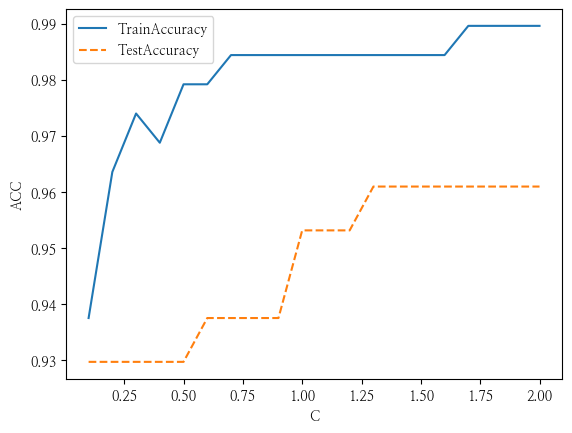

In [50]:
# 그래프
plt.plot(para_c, train_acc, linestyle = "-", label = "TrainAccuracy")
plt.plot(para_c, test_acc, linestyle = "--", label = "TestAccuracy")
plt.ylabel("ACC")
plt.xlabel("C")
plt.legend()

* Test 모델의 성능이 높고, Train 모델과 차이가 작아 일반성이 높은 1.3으로 설정하였다.

##### Gamma

In [51]:
train_acc = []
test_acc = []

para_gamma = [0.05*gamma for gamma in range(1,15)]

for v_gamma in para_gamma:
    svm_gamma_scaled = SVC(random_state = random, gamma = v_gamma, C = 1.3)
    svm_gamma_scaled.fit(df_scaled_train_x, df_train_y)
    train_acc.append(svm_gamma_scaled.score(df_scaled_train_x, df_train_y))
    test_acc.append(svm_gamma_scaled.score(df_scaled_test_x, df_test_y))

# 결과 저장
df_scaled_acc_gamma = pd.DataFrame()
df_scaled_acc_gamma["C"] = para_gamma
df_scaled_acc_gamma["TrainScore"] = train_acc
df_scaled_acc_gamma["TestScore"] = test_acc

In [52]:
df_scaled_acc_gamma.round(3)

,C,TrainScore,TestScore
0,0.05,0.990,0.953
1,0.10,0.995,0.945
2,0.15,1.000,0.922
3,0.20,1.000,0.922
4,0.25,1.000,0.906
5,0.30,1.000,0.859
6,0.35,1.000,0.844
7,0.40,1.000,0.805
8,0.45,1.000,0.789
9,0.50,1.000,0.781


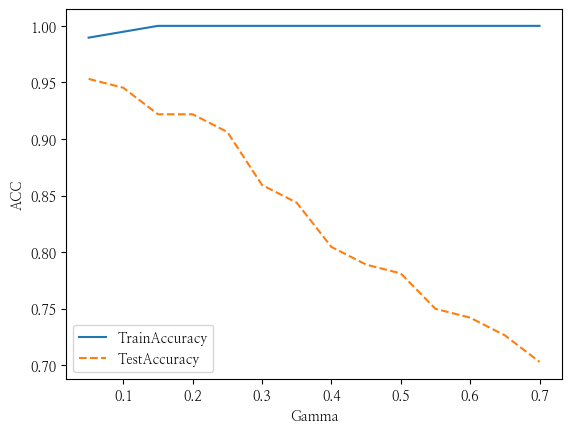

In [54]:
# 그래프
plt.plot(para_gamma, train_acc, linestyle = "-", label = "TrainAccuracy")
plt.plot(para_gamma, test_acc, linestyle = "--", label = "TestAccuracy")
plt.ylabel("ACC")
plt.xlabel("Gamma")
plt.legend()

* Gamma의 경우, 증가할 수록 Test 모델의 성능이 계속 줄어들어, 추후 GridSearchCV를 통해 최적의 값을 찾을 예정이다.

## 최종 Model 생성

In [66]:
svc_final = SVC(gamma = 0.05, C = 1.3, random_state = random)
svc_final.fit(df_scaled_train_x, df_train_y)
y_pred = svc_final.predict(df_scaled_test_x)
# ACC
print("Accuracy on train set : {:.3f}".format(svc_final.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(svc_final.score(df_scaled_test_x, df_test_y)))

Accuracy on train set : 0.990
Accuracy on test set : 0.953


In [67]:
# confusion matrix
print("Confusion matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))

Confusion matrix : 
[[81  2]
 [ 4 41]]


In [68]:
# 목표변수의 빈도 불균형 : f1 score
print(classification_report(df_test_y, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.953     0.976     0.964        83
           1      0.953     0.911     0.932        45

    accuracy                          0.953       128
   macro avg      0.953     0.944     0.948       128
weighted avg      0.953     0.953     0.953       128



### 최종모델 분석

1. 모델의 정확도는 0.953으로 Scale 전과 비교하여 0.70 상향되었다.

2. 분석의 목표는 실제 환자들에게서 종양을 분석하여 양성인자인지를 식별하는 것이다.  

    128의 test data에서 양성으로 예측한 recall 값은 0.911으로 높은 값이 도출되었다.  
    
    또한 실제로 암인데 정상으로 진단하는 비율은 0.089로 오진단의 비율은 낮게 측정되었다.

In [62]:
estimator = SVC(random_state=random)

param_gird = {"C" : para_c, "gamma" : para_gamma}

grid_rf = GridSearchCV(estimator, param_gird, scoring="accuracy", n_jobs = -1)
grid_rf.fit(df_scaled_train_x, df_train_y)
print("best estimator model: \n {0}".format(grid_rf.best_estimator_))
print("\n best parameter: \n {}".format(grid_rf.best_params_))
print("\n best score: \n {}".format(grid_rf.best_score_.round(3)))

best estimator model: 
 SVC(C=1.3, gamma=0.05, random_state=100)

 best parameter: 
 {'C': 1.3, 'gamma': 0.05}

 best score: 
 0.958
